In [1]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# load data
iris_data = datasets.load_iris()

# create data frame
df = pd.DataFrame(iris_data.data)
df.columns = iris_data.feature_names
df['target_class'] = iris_data.target
target_name = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
df['target_name'] = df.target_class.map(target_name)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_class,target_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


In [2]:
# draw diagram
def drawData(data):
    sns.lmplot(x="sepal length (cm)", y="petal length (cm)", data=data, fit_reg=False,hue="target_class")

# drawData(df)

In [3]:
# 因為我們只要玩binary classfication，所以只拿Setosa跟Versicolor出來玩
df_modify = df[(df.target_name == 'Setosa') | (df.target_name == 'Versicolor')]
df_modify = df_modify[['sepal length (cm)', 'petal length (cm)', 'target_name']]
target_class = {
    'Setosa': 1,
    'Versicolor' : -1}
df_modify['target_class'] = df_modify.target_name.map(target_class)
df_modify = df_modify.drop(columns='target_name')
df_modify.head()

,sepal length (cm),petal length (cm),target_class
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1


In [4]:
# 定義activate functioin
def sign(z):
    if z > 0 :
        return 1
    else:
        return -1


iterator: 0
x: [1.  5.1 1.4]
w: [1.  5.1 1.4]
iterator: 1
x: [1.  7.  4.7]
w: [ 0.  -1.9 -3.3]
iterator: 2
x: [1.  5.1 1.4]
w: [ 1.   3.2 -1.9]
iterator: 3
x: [1.  7.  4.7]
w: [ 0.  -3.8 -6.6]
iterator: 4
x: [1.  5.1 1.4]
w: [ 1.   1.3 -5.2]
iterator: 5
x: [1.  4.6 1.5]
w: [ 2.   5.9 -3.7]
iterator: 6
x: [1.  7.  4.7]
w: [ 1.  -1.1 -8.4]
iterator: 7
x: [1.  5.1 1.4]
w: [ 2.  4. -7.]
iterator: 8
x: [1.  5.7 3.5]
w: [  1.   -1.7 -10.5]
iterator: 9
x: [1.  5.1 1.4]
w: [ 2.   3.4 -9.1]


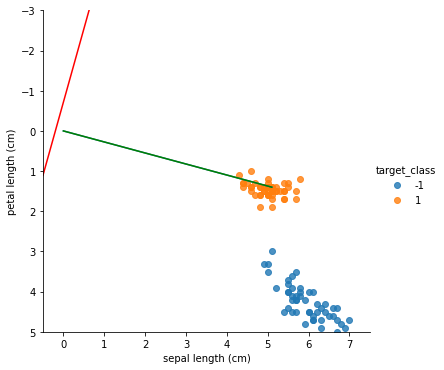

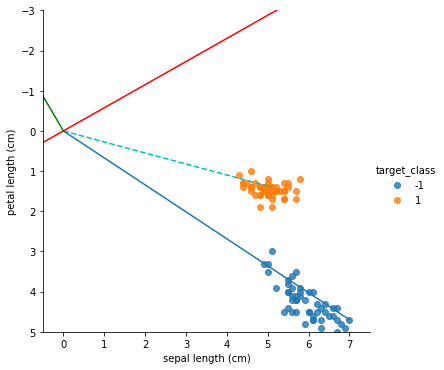

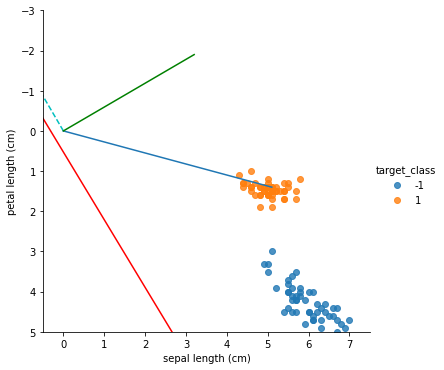

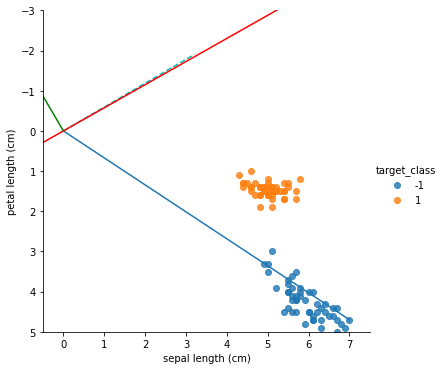

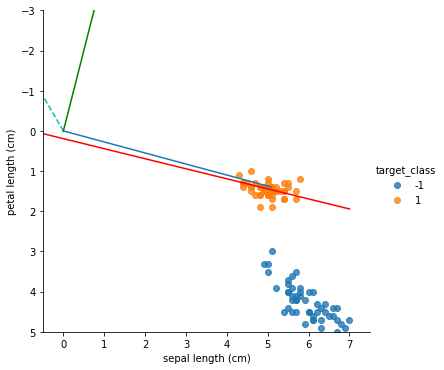

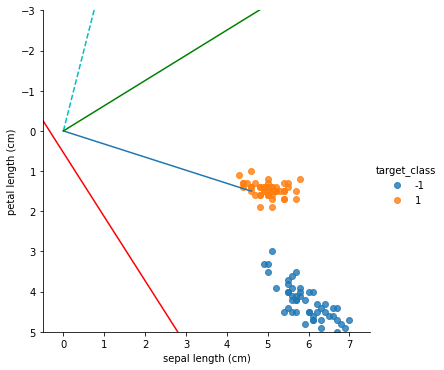

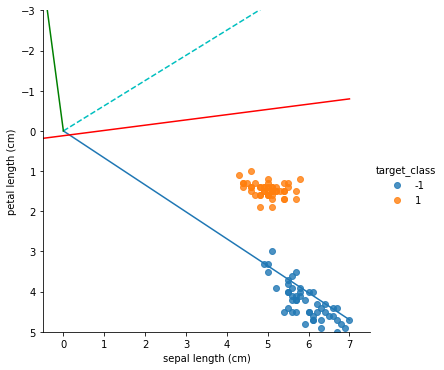

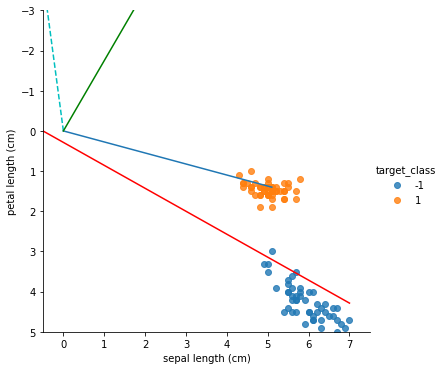

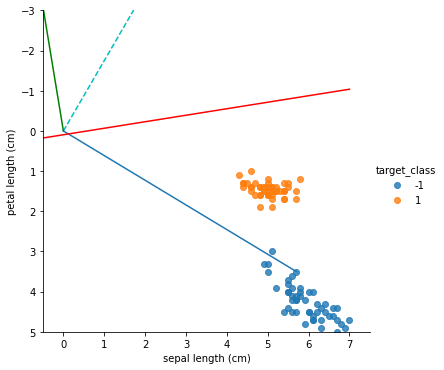

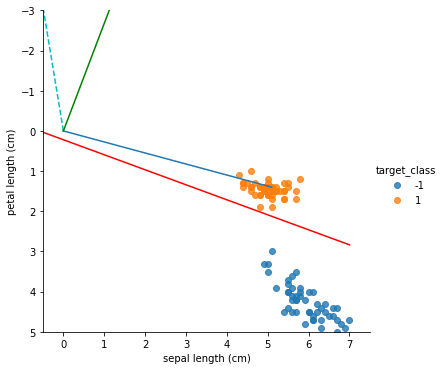

In [5]:
# iterate每筆資料
w = np.array([0, 0, 0])
error = 1
iterator = 0
while error != 0:
    error = 0
    for idx in range(len(df_modify)):
        x = np.concatenate((np.array([1.]), np.array(df_modify.iloc[idx])[:2]))
        y = np.array(df_modify.iloc[idx])[2]
    #     print("x:" + str(x))
    #     print("y:" + str(y))
        if sign(np.dot(w, x)) != y:
            print("iterator: "+str(iterator))
            iterator += 1
            error += 1
            drawData(df_modify)
            if w[1] != 0:
                x_last_decision_boundary = np.linspace(0, w[1])
                y_last_decision_boundary = (w[2]/w[1]) * x_last_decision_boundary
                plt.plot(x_last_decision_boundary, y_last_decision_boundary, 'c--')
            w = w + (y * x)
            print("x: " + str(x))
            print("w: " + str(w))
            x_vector = np.linspace(0, x[1])
            y_vector = (x[2]/x[1]) * x_vector
            plt.plot(x_vector, y_vector)
            x_decision_boundary = np.linspace(-0.5, 7)
            y_decision_boundary = (-w[1]/w[2]) * x_decision_boundary - (w[0]/w[2])
            plt.plot(x_decision_boundary, y_decision_boundary, 'r')
            x_decision_boundary_normal_vector = np.linspace(0, w[1])
            y_decision_boundary_normal_vector = (w[2]/w[1]) * x_decision_boundary_normal_vector
            plt.plot(x_decision_boundary_normal_vector, y_decision_boundary_normal_vector, 'g')
            plt.xlim(-0.5, 7.5)
            plt.ylim(5, -3)
            plt.show()